# Arbeitsauftrag: Case Study Titanic   
Heute wirst du einen Datensatz aufbereiten, explorieren, Erkenntnisse gewinnen und diese am Ende auch visualisieren. Du führst eine vollständige Datenanalyse Fallstudie durch.    

### Dein Auftrag:   
• Lade den Titanic-Datensatz aus seaborn und analysiere ihn.    
• Im Zentrum deiner Analyse stehen die Spalten „Survived“ (Überlebensstatus) und „Fare“ (Ticketpreis). Deine Analysen sollen sich immer auf diese beiden Variablen konzentrieren.   
• Untersuche, wie sich „Leben und Geld“ bei den folgenden Variablen darstellen:   
                o	Personenklasse (Pclass)   
                o	Geschlecht (Sex)   
                o	Alter (Age)   
                o	Abreisehafen (Embarked)   
                o	Familiengröße (1 + SibSp + Parch)  
         
#### Aufgaben:   
1.	Kombiniere die beiden Hauptvariablen „Survived“ und „Fare“ mit jeder der oben genannten Variablen.  
2.	Erstelle für jede Kombination:   
        o	Eine tabellarische Ansicht (z.B. durch Aggregation, Pivotierung, und bedingte Formatierung der Daten, um wichtige Ergebnisse hervorzuheben).   
        o	Eine grafische Ansicht (wähle eine passende Grafik für jede Kombination aus und gestalte diese ordentlich mit Titel, Achsenbeschriftungen, Grids, Farben, Highlights usw. Denke auch an mögliche Interaktivitäten durch Slider und Auswahlmöglichkeiten).   
        o	Eine schriftliche Zusammenfassung, in der du die wichtigsten Erkenntnisse aus deiner Analyse darlegst. Diese schriftliche Zusammenfassung reicht in groben Stichpunkten, die du dann per ChatGPT zu einem passenden Volltext erweitern kannst.    
Hinweis: Zum Start solltest du für jede Variablenkombination jeweils eine Tabelle und eine Grafik erstellen – also insgesamt 10 Tabellen und 10 Grafiken. Du kannst diese natürlich auch weiter zusammenfassen und zum Beispiel durch Subplots zusammenfassen.   

3.	Lade zum Schluss deine vollständige Analyse auf dein GIThub-Profil hoch und teile dies mit Eric   


In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

In [137]:
titanic_df = pd.DataFrame(sns.load_dataset('titanic'))

# Erstellung neuer Spalten zur Detailauswertung

# Erstellung Spalte Alters-Cluster
titanic_df.insert(4, 'age_cluster', pd.cut(titanic_df['age'], bins=[0,10,20,30,40,50,60,70,80]
                                   , labels=['0-10 Jahre', '11-20 Jahre', '21-30 Jahre',
                                   '31-40 Jahre', '41-50 Jahre', '51-60 Jahre', '61-70 Jahre'
                                   , '71-80 Jahre']))

# Erstellung Spalte Familiengröße

titanic_df['family_size'] = 1 + titanic_df['sibsp'] + titanic_df['parch']

titanic_df.head()

,survived,pclass,sex,age,age_cluster,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.0,21-30 Jahre,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,31-40 Jahre,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,21-30 Jahre,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,31-40 Jahre,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,31-40 Jahre,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


Die tabelarische Ansicht der Zählung des Überlebens-Status für die Personenklasse:


pclass
pclass survived        
1      0             80
       1            136
2      0             97
       1             87
3      0            372
       1            119

Die grafische Ansicht der Zählung des Überlebens-Status für die Personenklasse:


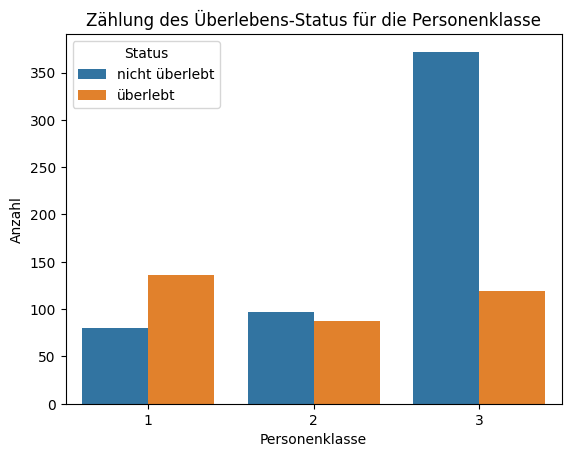

In [138]:
# Survived + Personenklasse (pclass)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Zählung des Überlebens-Status für die Personenklasse:')
display(titanic_df.groupby(['pclass', 'survived'])[['pclass']].count())

# Erstellung grafischen Ansicht
print('Die grafische Ansicht der Zählung des Überlebens-Status für die Personenklasse:')
sns.countplot(data= titanic_df, x='pclass', hue='survived')
plt.title('Zählung des Überlebens-Status für die Personenklasse')
plt.ylabel('Anzahl')
plt.xlabel('Personenklasse')
plt.legend(['nicht überlebt', 'überlebt'], title='Status')

Die tabelarische Ansicht der Zählung des Überlebens-Status für die Geschlechter:


survived
survived sex             
0        female        81
         male         468
1        female       233
         male         109

Die grafische Ansicht der Zählung des Überlebens-Status für die Geschlechter:


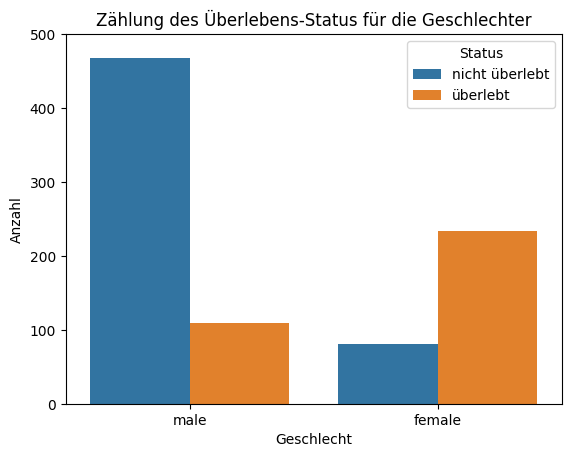

In [139]:
# Survived + Geschlecht (sex)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Zählung des Überlebens-Status für die Geschlechter:')
display(titanic_df.groupby(['survived', 'sex'])[['survived']].count())

# Erstellung grafischen Ansicht
print('Die grafische Ansicht der Zählung des Überlebens-Status für die Geschlechter:')
sns.countplot(data= titanic_df, x='sex', hue='survived')
plt.title('Zählung des Überlebens-Status für die Geschlechter')
plt.ylabel('Anzahl')
plt.ylim(0, 500)
plt.xlabel('Geschlecht')
plt.legend(['nicht überlebt', 'überlebt'], title='Status')

Die tabelarische Ansicht der Zählung des Überlebens-Status für die Altersgruppen:


survived
age_cluster survived          
0-10 Jahre  0               26
            1               38
11-20 Jahre 0               71
            1               44
21-30 Jahre 0              146
            1               84
31-40 Jahre 0               86
            1               69
41-50 Jahre 0               53
            1               33
51-60 Jahre 0               25
            1               17
61-70 Jahre 0               13
            1                4
71-80 Jahre 0                4
            1                1

Die grafische Ansicht der Zählung des Überlebens-Status für die Altersgruppen:


Text(0.5, 1.0, 'Zählung des Überlebens-Status nach Alterklassen')

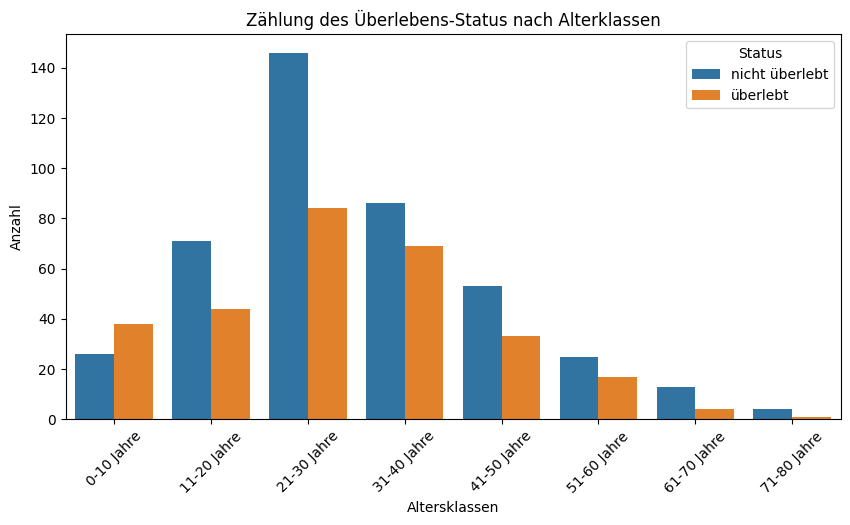

In [140]:
# Survived + Alter (age)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Zählung des Überlebens-Status für die Altersgruppen:')
display(titanic_df.groupby(['age_cluster', 'survived'], observed=False)['survived'].count().to_frame())

# Erstellung grafischen Ansicht
print('Die grafische Ansicht der Zählung des Überlebens-Status für die Altersgruppen:')
plt.figure(figsize=(10, 5))
sns.countplot(data= titanic_df, x='age_cluster', hue='survived')
plt.ylabel('Anzahl')
plt.xlabel('Altersklassen')
plt.xticks(rotation=45)
plt.legend(['nicht überlebt', 'überlebt'], title='Status')
plt.title('Zählung des Überlebens-Status nach Alterklassen')

Die tabelarische Ansicht der Zählung des Überlebens-Status für die Abfahrhäfen:


embark_town
embark_town survived             
Cherbourg   0                  75
            1                  93
Queenstown  0                  47
            1                  30
Southampton 0                 427
            1                 217

Die tabelarische Ansicht der Zählung des Überlebens-Status für die Abfahrhäfen:


Text(0.5, 0, 'Abfahrhafen')

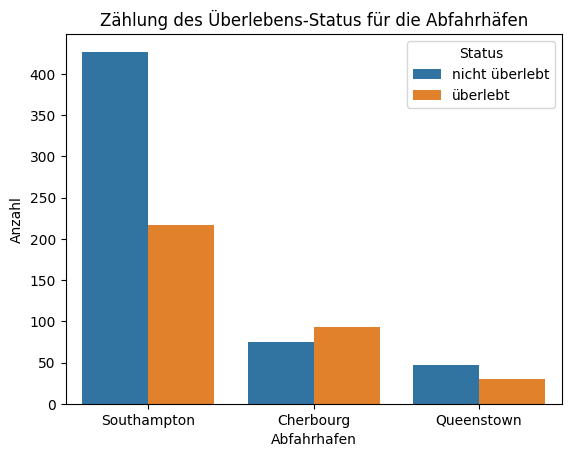

In [141]:
# Survived + Abreisehafen (embarked)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Zählung des Überlebens-Status für die Abfahrhäfen:')
display(titanic_df.groupby(['embark_town', 'survived'])['embark_town'].count().to_frame())

# Erstellung grafischen Ansicht
print('Die tabelarische Ansicht der Zählung des Überlebens-Status für die Abfahrhäfen:')
sns.countplot(data= titanic_df, x='embark_town', hue='survived')
plt.legend(['nicht überlebt', 'überlebt'], title='Status')
plt.title('Zählung des Überlebens-Status für die Abfahrhäfen')
plt.ylabel('Anzahl')
plt.xlabel('Abfahrhafen')

Die tabelarische Ansicht der Zählung des Überlebens-Status für die Familiengrößen:


family_size
family_size survived             
1           0                 374
            1                 163
2           0                  72
            1                  89
3           0                  43
            1                  59
4           0                   8
            1                  21
5           0                  12
            1                   3
6           0                  19
            1                   3
7           0                   8
            1                   4
8           0                   6
11          0                   7

Die grafische Ansicht der Zählung des Überlebens-Status für die Familiengrößen:


Text(0.5, 0, 'Familiengrößen')

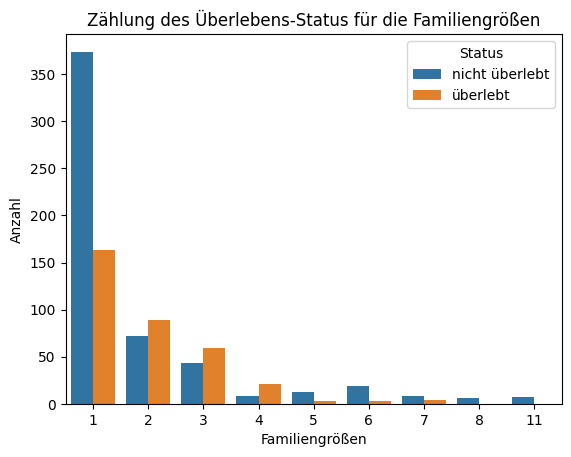

In [142]:
# Survived + Familiengröße ( 1 + sibsp + parch)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Zählung des Überlebens-Status für die Familiengrößen:')
display(titanic_df.groupby(['family_size', 'survived'])['family_size'].count().to_frame())

# Erstellung grafischen Ansicht
print('Die grafische Ansicht der Zählung des Überlebens-Status für die Familiengrößen:')
sns.countplot(data= titanic_df, x='family_size', hue='survived')
plt.legend(['nicht überlebt', 'überlebt'], title='Status')
plt.title('Zählung des Überlebens-Status für die Familiengrößen')
plt.ylabel('Anzahl')
plt.xlabel('Familiengrößen')

Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Personenklassen:


,fare
pclass,
1,84.15
2,20.66
3,13.68


Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Personenklasse:


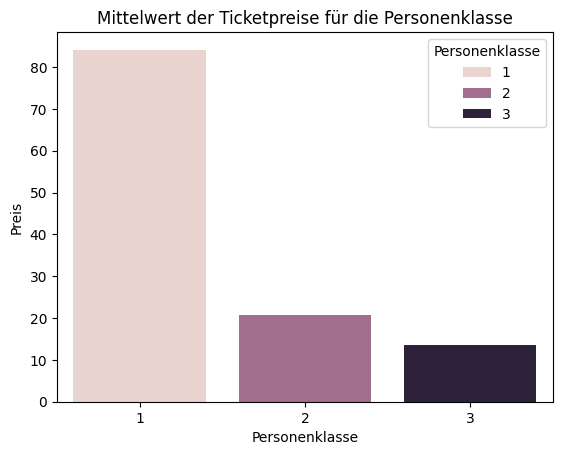

In [143]:
# Fare + Personenklasse (pclass)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Personenklassen:')
display(titanic_df.groupby('pclass')['fare'].mean().round(2).to_frame())

# Erstellung grafischen Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Personenklasse:')
sns.barplot(data= titanic_df, x='pclass', y='fare', hue='pclass', errorbar=None)
plt.title('Mittelwert der Ticketpreise für die Personenklasse')
plt.xlabel('Personenklasse')
plt.ylabel('Preis')
plt.legend(title='Personenklasse')

Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Geschlechter:


,fare
sex,
female,44.48
male,25.52


Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Geschlechter:


Text(0, 0.5, 'Preis')

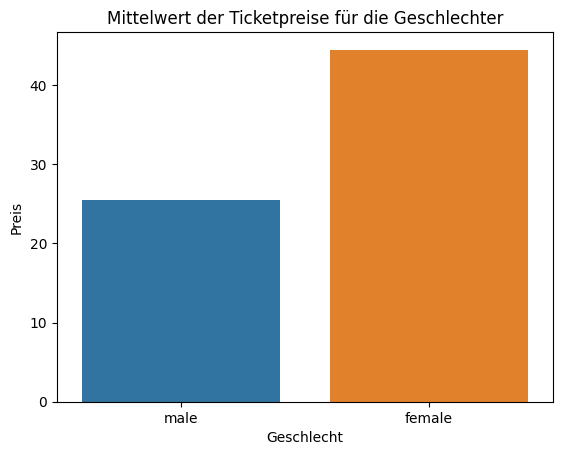

In [144]:
# Fare + Geschlecht (sex)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Geschlechter:')
display(titanic_df.groupby('sex')['fare'].mean().round(2).to_frame())

# Erstellung grafischen Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Geschlechter:')
sns.barplot(data= titanic_df, x='sex', y='fare', hue='sex', errorbar=None)
plt.title('Mittelwert der Ticketpreise für die Geschlechter')
plt.xlabel('Geschlecht')
plt.ylabel('Preis')

Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Altersklassen:


fare
age_cluster pclass        
0-10 Jahre  1       128.32
            2        28.74
            3        24.42
11-20 Jahre 1       114.11
            2        20.93
            3        12.22
21-30 Jahre 1        96.42
            2        21.32
            3        10.49
31-40 Jahre 1        99.22
            2        20.69
            3        13.26
41-50 Jahre 1        74.08
            2        21.50
            3        13.02
51-60 Jahre 1        64.92
            2        18.28
            3         7.63
61-70 Jahre 1        65.95
            2        10.50
            3         7.86
71-80 Jahre 1        38.05
            2          NaN
            3         7.76

Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Altersklassen ( ohne und mit Personenklasse ):


C:\Users\Admin\AppData\Local\Temp\ipykernel_15896\2287801248.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15896\2287801248.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)


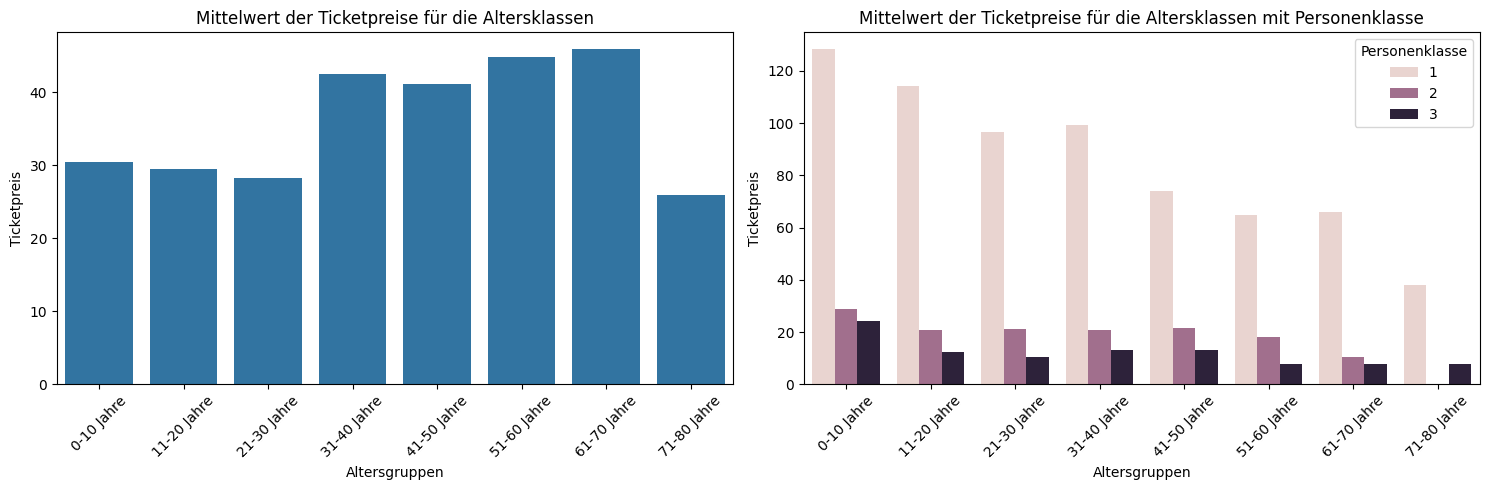

In [145]:
# Fare + Alter (age)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Altersklassen:')
display(titanic_df.groupby(['age_cluster', 'pclass'], observed=False)['fare'].mean().round(2).to_frame())


# Erstellung grafischen Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Altersklassen ( ohne und mit Personenklasse ):')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=titanic_df, x='age_cluster', y='fare', errorbar=None, ax=axs[0])
axs[0].set_title('Mittelwert der Ticketpreise für die Altersklassen')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
axs[0].set_ylabel('Ticketpreis')
axs[0].set_xlabel('Altersgruppen')


sns.barplot(data=titanic_df, x='age_cluster', y='fare', hue='pclass', errorbar=None, ax=axs[1])
axs[1].set_title('Mittelwert der Ticketpreise für die Altersklassen mit Personenklasse')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
axs[1].set_ylabel('Ticketpreis')
axs[1].set_xlabel('Altersgruppen')
axs[1].legend(title='Personenklasse')

plt.tight_layout()
plt.show()

Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Abfahrhäfen:


fare
embark_town pclass        
Cherbourg   1       104.72
            2        25.36
            3        11.21
Queenstown  1        90.00
            2        12.35
            3        11.18
Southampton 1        70.36
            2        20.33
            3        14.64

Die grafische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Abfahrhäfen ( ohne und mit Personenklasse ):


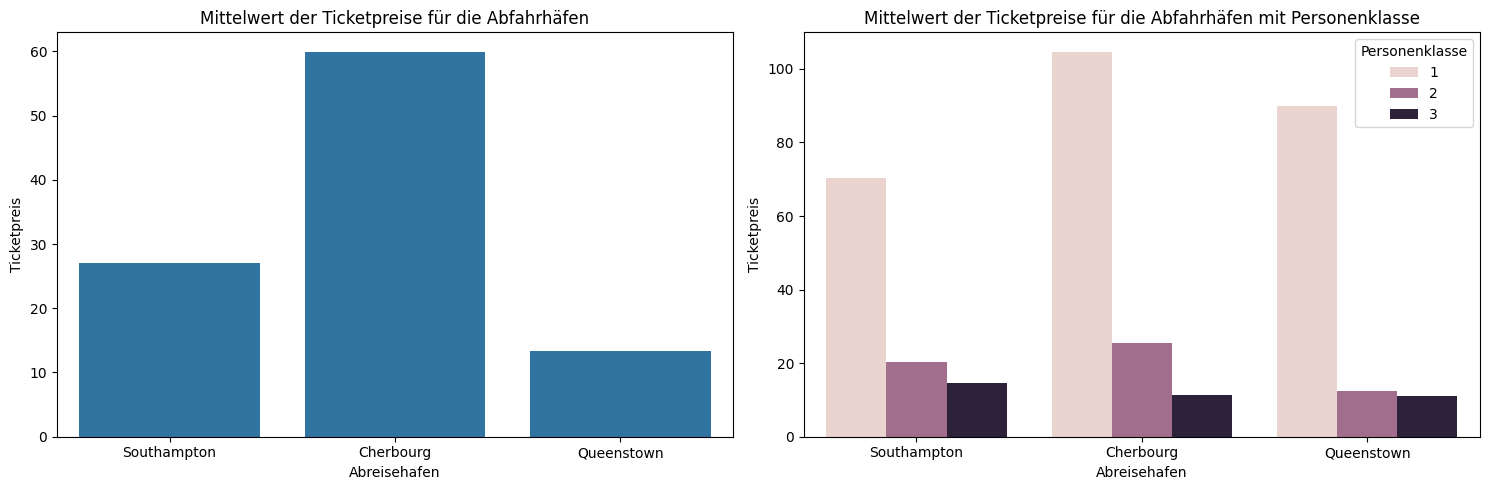

In [146]:
# Fare + Abreisehafen (embarked)

# Tabelarische Ansicht
print('Die tabelarische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Abfahrhäfen:')
display(titanic_df.groupby(['embark_town', 'pclass'])['fare'].mean().round(2).to_frame())

# Grafische Ansicht
print('Die grafische Ansicht der Übersicht des Mittelwerts der Ticketpreise für die Abfahrhäfen ( ohne und mit Personenklasse ):')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data= titanic_df, x='embark_town', y='fare', errorbar=None, ax=axs[0])
axs[0].set_title('Mittelwert der Ticketpreise für die Abfahrhäfen')
axs[0].set_ylabel('Ticketpreis')
axs[0].set_xlabel('Abreisehafen')

sns.barplot(data= titanic_df, x='embark_town', y='fare', hue='pclass', errorbar=None, ax=axs[1])
axs[1].set_title('Mittelwert der Ticketpreise für die Abfahrhäfen mit Personenklasse')
axs[1].set_ylabel('Ticketpreis')
axs[1].set_xlabel('Abreisehafen')
axs[1].legend(title='Personenklasse')


plt.tight_layout()
plt.show()



Die tabelarische Ansicht des Mittelwerts der Ticketpreise für die Familiengrößen:


,fare
family_size,
1,21.24
2,49.89
3,39.69
4,54.86
5,58.09
6,73.72
7,29.37
8,46.90
11,69.55


Die grafische Ansicht des Mittelwerts der Ticketpreise für die Familiengrößen:


Text(0.5, 0, 'Familiengrößen')

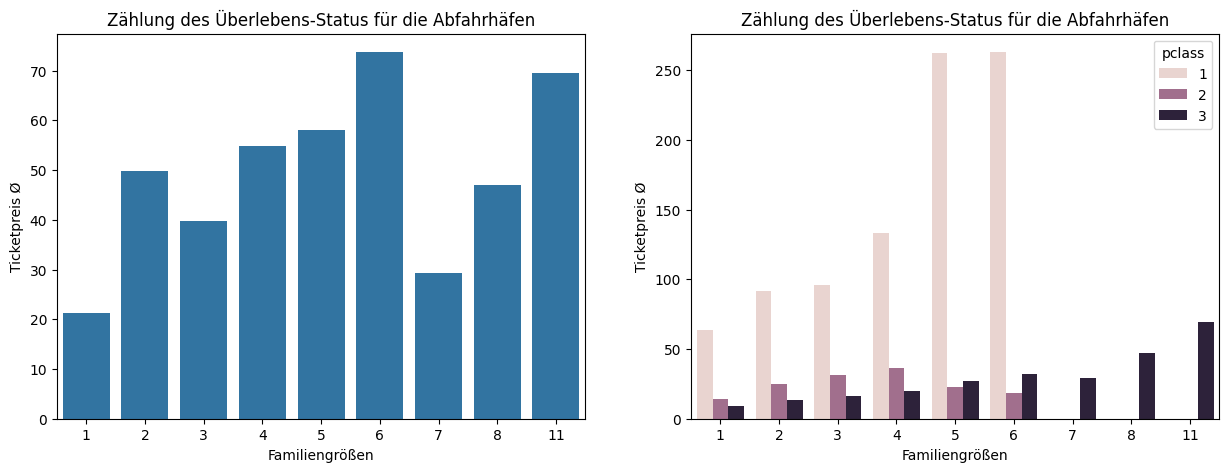

In [147]:
# Fare + Familiengröße ( 1 + sibsp + parch)

# Erstellung tabelarische Ansicht
print('Die tabelarische Ansicht des Mittelwerts der Ticketpreise für die Familiengrößen:')
display(titanic_df.groupby('family_size')['fare'].mean().round(2).to_frame())

# Erstellung grafischen Ansicht
print('Die grafische Ansicht des Mittelwerts der Ticketpreise für die Familiengrößen:')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data= titanic_df, x='family_size', y='fare', ax= axs[0], errorbar=None)
axs[0].set_title('Zählung des Überlebens-Status für die Abfahrhäfen')
axs[0].set_ylabel('Ticketpreis Ø')
axs[0].set_xlabel('Familiengrößen')

sns.barplot(data= titanic_df, x='family_size', y='fare',  hue='pclass',ax = axs[1], errorbar=None)
axs[1].set_title('Zählung des Überlebens-Status für die Abfahrhäfen')
axs[1].set_ylabel('Ticketpreis Ø')
axs[1].set_xlabel('Familiengrößen')

C:\Users\Admin\AppData\Local\Temp\ipykernel_15896\3166852639.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


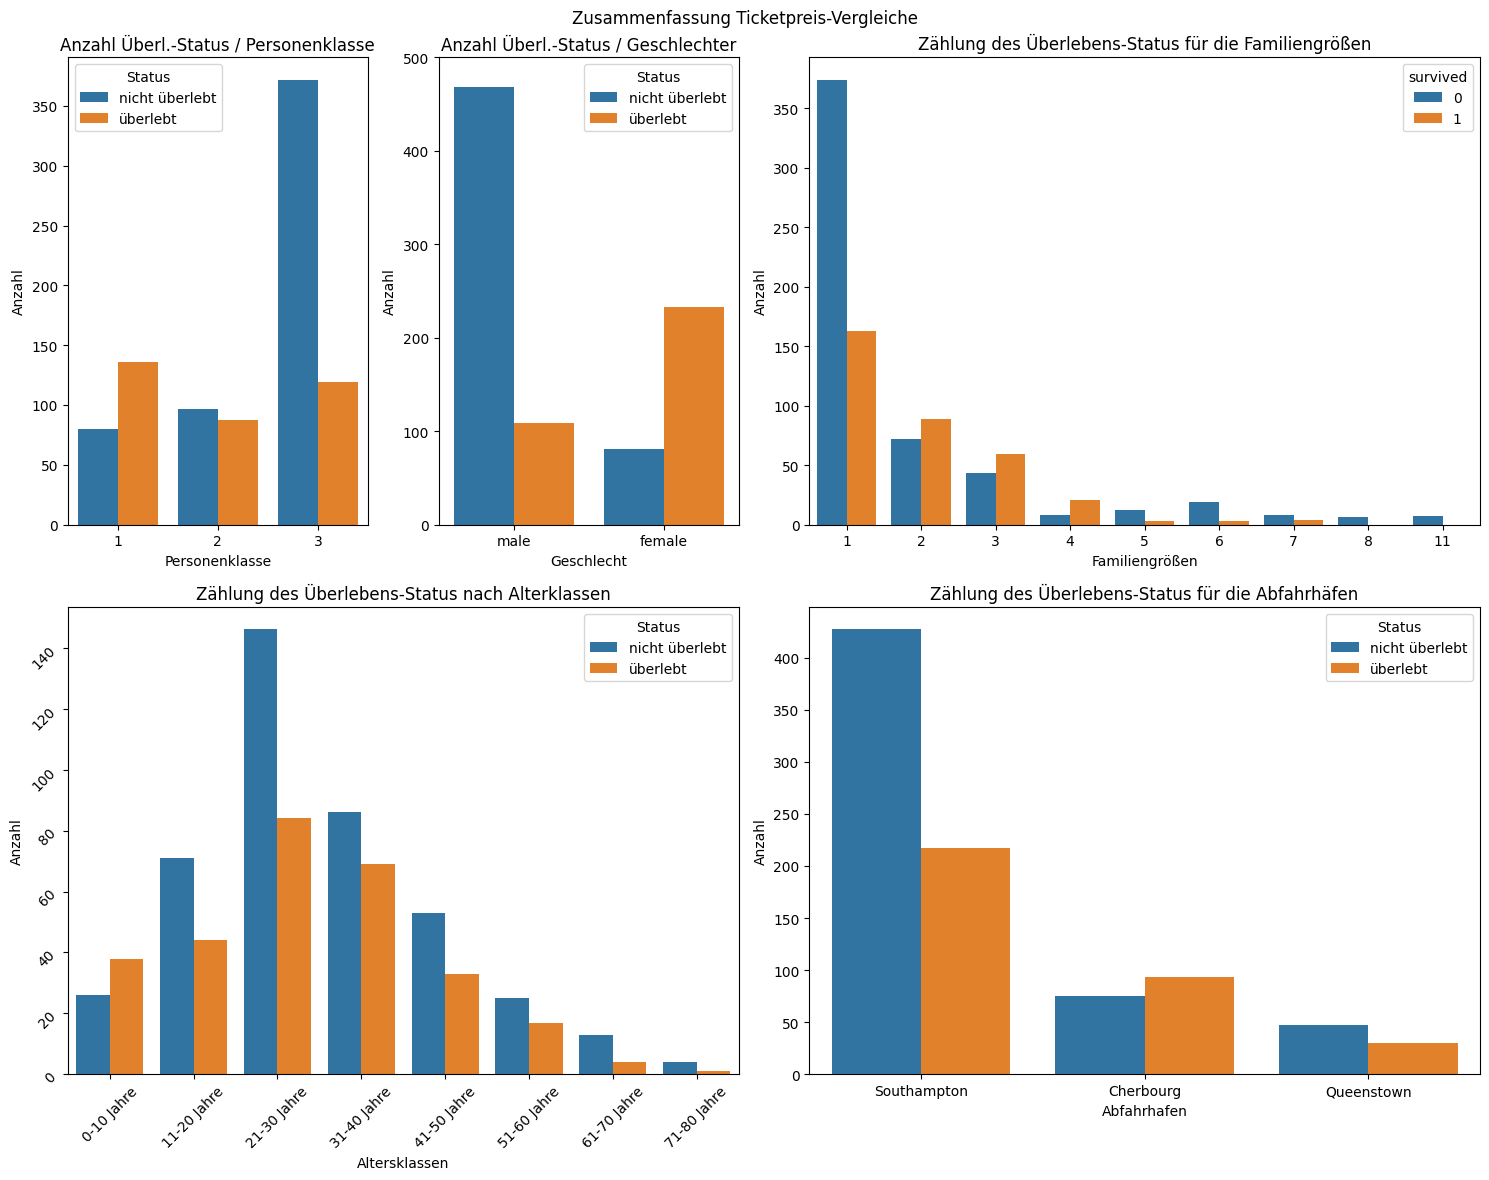

In [158]:
# Gesamtdarstellung Survived-Vergleiche

fare_plot = plt.figure(layout="constrained", figsize=(15,12)).subplot_mosaic(
    """
    ABCC
    DDEE
    """
)

plt.suptitle('Zusammenfassung Ticketpreis-Vergleiche')

sns.countplot(data= titanic_df, x='pclass', hue='survived', ax=fare_plot['A'])
fare_plot['A'].set_title('Anzahl Überl.-Status / Personenklasse')
fare_plot['A'].set_ylabel('Anzahl')
fare_plot['A'].set_xlabel('Personenklasse')
fare_plot['A'].legend(['nicht überlebt', 'überlebt'], title='Status')
sns.countplot(data= titanic_df, x='sex', hue='survived', ax=fare_plot['B'])
fare_plot['B'].set_title('Anzahl Überl.-Status / Geschlechter')
fare_plot['B'].set_ylabel('Anzahl')
fare_plot['B'].set_ylim(0, 500)
fare_plot['B'].set_xlabel('Geschlecht')
fare_plot['B'].legend(['nicht überlebt', 'überlebt'], title='Status')
sns.countplot(data= titanic_df, x='family_size', hue='survived', ax=fare_plot['C'])
plt.legend(['nicht überlebt', 'überlebt'], title='Status')
fare_plot['C'].set_title('Zählung des Überlebens-Status für die Familiengrößen')
fare_plot['C'].set_ylabel('Anzahl')
fare_plot['C'].set_xlabel('Familiengrößen')
sns.countplot(data= titanic_df, x='age_cluster', hue='survived', ax=fare_plot['D'])
fare_plot['D'].set_ylabel('Anzahl')
fare_plot['D'].set_xlabel('Altersklassen')
fare_plot['D'].tick_params(rotation=45)
fare_plot['D'].legend(['nicht überlebt', 'überlebt'], title='Status')
fare_plot['D'].set_title('Zählung des Überlebens-Status nach Alterklassen')
sns.countplot(data= titanic_df, x='embark_town', hue='survived', ax=fare_plot['E'])
fare_plot['E'].legend(['nicht überlebt', 'überlebt'], title='Status')
fare_plot['E'].set_title('Zählung des Überlebens-Status für die Abfahrhäfen')
fare_plot['E'].set_ylabel('Anzahl')
fare_plot['E'].set_xlabel('Abfahrhafen')


plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_15896\3221774136.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


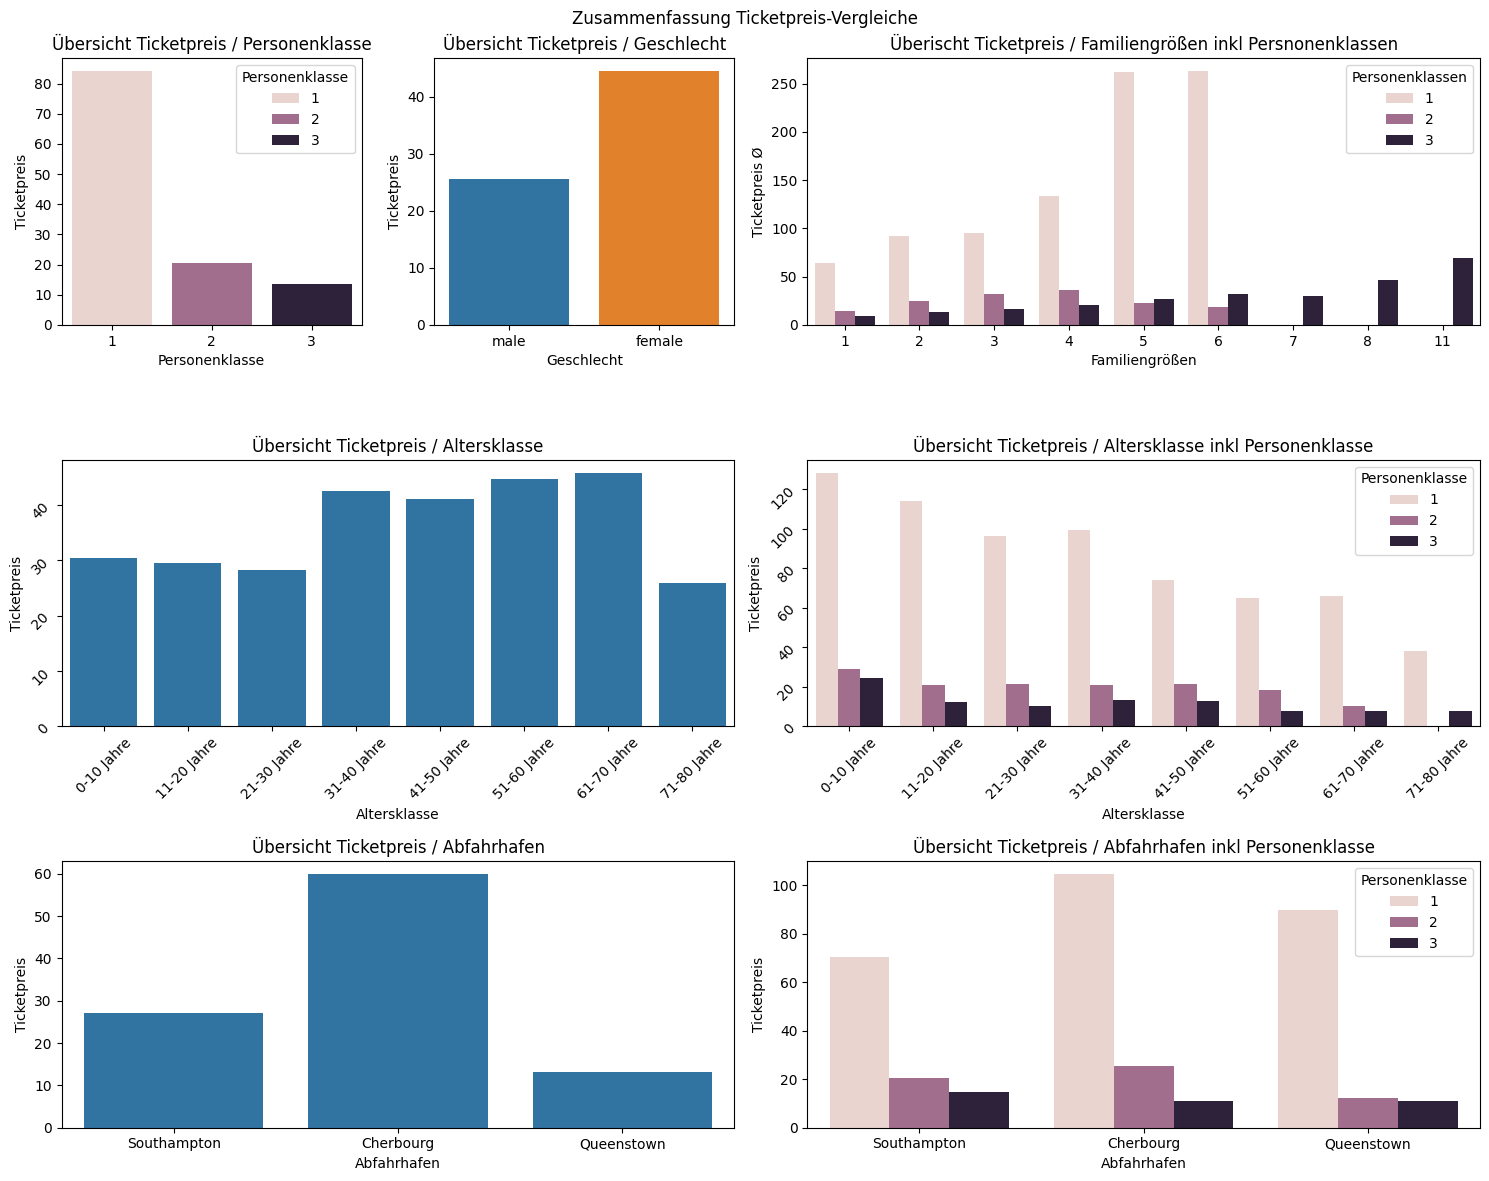

In [159]:
# Gesamtdarstellung Fare-Vergleiche

fare_plot = plt.figure(layout="constrained", figsize=(15,12)).subplot_mosaic(
    """
    ABCC
    DDEE
    FFGG
    """
)

plt.suptitle('Zusammenfassung Ticketpreis-Vergleiche')

sns.barplot(data= titanic_df, x='pclass', y='fare', hue='pclass', errorbar=None, ax=fare_plot['A'])
fare_plot['A'].set_title('Übersicht Ticketpreis / Personenklasse')
fare_plot['A'].set_ylabel('Ticketpreis')
fare_plot['A'].set_xlabel('Personenklasse')
fare_plot['A'].legend(title='Personenklasse')
sns.barplot(data= titanic_df, x='sex', y='fare', hue='sex', errorbar=None, ax=fare_plot['B'])
fare_plot['B'].set_title('Übersicht Ticketpreis / Geschlecht')
fare_plot['B'].set_ylabel('Ticketpreis')
fare_plot['B'].set_xlabel('Geschlecht')
sns.barplot(data= titanic_df, x='family_size', y='fare',  hue='pclass', ax=fare_plot['C'], errorbar=None)
fare_plot['C'].set_title('Überischt Ticketpreis / Familiengrößen inkl Persnonenklassen')
fare_plot['C'].set_ylabel('Ticketpreis Ø')
fare_plot['C'].set_xlabel('Familiengrößen')
fare_plot['C'].legend(title='Personenklassen')
sns.barplot(data=titanic_df, x='age_cluster', y='fare', errorbar=None, ax=fare_plot['D'])
fare_plot['D'].set_title('Übersicht Ticketpreis / Altersklasse')
fare_plot['D'].set_ylabel('Ticketpreis')
fare_plot['D'].set_xlabel('Altersklasse')
fare_plot['D'].tick_params(rotation=45)
sns.barplot(data=titanic_df, x='age_cluster', y='fare', hue='pclass', errorbar=None, ax=fare_plot['E'])
fare_plot['E'].set_title('Übersicht Ticketpreis / Altersklasse inkl Personenklasse')
fare_plot['E'].set_ylabel('Ticketpreis')
fare_plot['E'].set_xlabel('Altersklasse')
fare_plot['E'].legend(title='Personenklasse')
fare_plot['E'].tick_params(rotation=45)
sns.barplot(data=titanic_df, x='embark_town', y='fare', errorbar=None, ax=fare_plot['F'])
fare_plot['F'].set_title('Übersicht Ticketpreis / Abfahrhafen')
fare_plot['F'].set_ylabel('Ticketpreis')
fare_plot['F'].set_xlabel('Abfahrhafen')
sns.barplot(data= titanic_df, x='embark_town', y='fare', hue='pclass', errorbar=None, ax=fare_plot['G'])
fare_plot['G'].set_title('Übersicht Ticketpreis / Abfahrhafen inkl Personenklasse')
fare_plot['G'].set_ylabel('Ticketpreis')
fare_plot['G'].set_xlabel('Abfahrhafen')
fare_plot['G'].legend(title='Personenklasse')

plt.tight_layout()
plt.show()


# Schrifltiche Zusammenfassung

### Die Analyse der Titanic-Daten liefert interessante Erkenntnisse über die Überlebenswahrscheinlichkeiten und Ticketpreise in verschiedenen demografischen und sozialen Kategorien. Im Folgenden werden die wichtigsten Erkenntnisse zusammengefasst:

##### Überlebensstatus in Abhängigkeit von Personenklassen:

Personen der ersten Klasse hatten eine deutlich höhere Überlebensrate als die der zweiten und dritten Klasse. 

- Überlebensstatus nach Geschlecht:

                Frauen hatten eine signifikant höhere Überlebenswahrscheinlichkeit im Vergleich zu Männern. Besonders auffällig ist, dass die meisten überlebenden Frauen aus der ersten und zweiten Klasse kamen.

- Überlebensstatus nach Altersgruppen:

                Kinder (0-10 Jahre) hatten eine höhere Überlebenswahrscheinlichkeit, insbesondere in Kombination mit Familienmitgliedern. Die Überlebensrate nahm mit dem Alter tendenziell ab, was zeigt, dass jüngere Passagiere besser geschützt wurden.

- Überlebensstatus nach Abreisehafen:

                Passagiere, die in Cherbourg (Frankreich) an Bord gingen, hatten im Vergleich zu denen, die in Southampton (UK) und Queenstown (Irland) an Bord gingen, eine höhere Überlebensrate. Dies korrelierte mit einem höheren Anteil von Passagieren der ersten Klasse, die in Cherbourg zustiegen.

- Überlebensstatus nach Familiengröße:

        Kleine Familien oder Einzelreisende hatten eine niedrigere Überlebensrate im Vergleich zu Familien mit mehr als 3 Personen. Das deutet darauf hin, dass die Anwesenheit von Familienmitgliedern den Überlebensstatus positiv beeinflusst haben könnte.

- Ticketpreise im Zusammenhang mit Personenklassen:

                Der durchschnittliche Ticketpreis war erwartungsgemäß in der ersten Klasse am höchsten und sank mit jeder Klasse. Der Preis für Passagiere der dritten Klasse war signifikant niedriger, was ihre geringere Überlebenswahrscheinlichkeit widerspiegeln könnte.

- Ticketpreise im Zusammenhang mit Geschlecht:

                Männer und Frauen zahlten im Durchschnitt ähnliche Ticketpreise, wobei es keine signifikanten Unterschiede zwischen den Geschlechtern gab. Frauen waren jedoch stärker in der ersten Klasse vertreten.

- Ticketpreise nach Altersgruppen:

                Jüngere Passagiere, insbesondere Kinder und Jugendliche, zahlten tendenziell geringere Ticketpreise. Mit zunehmendem Alter stieg der durchschnittlich gezahlte Preis. Dies wurde noch deutlicher, wenn man die Personenklassen hinzunahm.

- Ticketpreise nach Abreisehafen:

                Passagiere, die in Cherbourg an Bord gingen, zahlten im Durchschnitt deutlich höhere Preise als jene, die in Southampton oder Queenstown eintraten. Auch hier korrelierte der Preis stark mit der Personenklasse.

- Ticketpreise nach Familiengröße:

                Größere Familien zahlten tendenziell mehr für ihre Tickets, was aufgrund der größeren Anzahl von Reisenden zu erwarten war. Auch hier spielten die Personenklassen eine Rolle, da größere Familien häufiger in den niedrigeren Klassen reisten.

                
Insgesamt zeigt die Analyse, dass Faktoren wie soziale Klasse, Geschlecht, Alter, Familiengröße und der Abreisehafen eng mit der Überlebenswahrscheinlichkeit und den gezahlten Ticketpreisen auf der Titanic verknüpft waren. Vor allem Passagiere der ersten Klasse und Frauen hatten bessere Überlebenschancen.